predict room occupancy (Occupied / Empty) based on IoT sensor readings.

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate timestamps (simulate a workday)
timestamps = pd.date_range("2025-10-20 08:00", periods=n_samples, freq="5min")

# Simulate sensor readings
temperature = np.random.normal(23, 2, n_samples)
humidity = np.random.normal(50, 10, n_samples)
co2 = np.random.normal(800, 300, n_samples)
light = np.random.normal(500, 400, n_samples).clip(0, 2000)
sound = np.random.normal(45, 10, n_samples).clip(20, 80)
motion = np.random.choice([0, 1], size=n_samples, p=[0.4, 0.6])

# Define occupancy based on conditions (for realism)
occupancy = ((light > 300) & (co2 > 600) & (motion == 1)).astype(int)

# Combine into a DataFrame
df = pd.DataFrame({
    "Timestamp": timestamps,
    "Temperature": np.round(temperature, 2),
    "Humidity": np.round(humidity, 2),
    "CO2": np.round(co2, 2),
    "Light": np.round(light, 2),
    "Sound": np.round(sound, 2),
    "Motion": motion,
    "Occupancy": occupancy
})

# Save as CSV
df.to_csv("room_occupancy_iot.csv", index=False)

df.head(10)


,Timestamp,Temperature,Humidity,CO2,Light,Sound,Motion,Occupancy
0,2025-10-20 08:00:00,23.99,59.26,1219.81,811.34,38.25,1,1
1,2025-10-20 08:05:00,22.72,69.09,1077.39,279.53,43.55,1,0
2,2025-10-20 08:10:00,24.30,36.01,817.89,172.72,37.08,0,0
3,2025-10-20 08:15:00,26.05,55.63,605.92,498.65,41.92,0,0
4,2025-10-20 08:20:00,22.53,43.49,1009.47,431.93,26.06,0,0
5,2025-10-20 08:25:00,22.53,45.13,918.05,318.71,47.13,0,0
6,2025-10-20 08:30:00,26.16,44.08,1068.56,778.55,45.01,1,1
7,2025-10-20 08:35:00,24.53,41.36,990.55,882.12,36.83,1,1
8,2025-10-20 08:40:00,22.06,50.49,1114.87,535.36,51.59,0,0
9,2025-10-20 08:45:00,24.09,41.69,639.43,1091.01,54.38,0,0


IoT Room Occupancy Dataset + Visualization

✅ Dataset created successfully!
            Timestamp Room_ID  Temperature  Humidity      CO2   Light  Sound  \
0 2025-10-20 08:00:00  Room_B        23.99     59.26  1219.81  811.34  38.25   
1 2025-10-20 08:05:00  Room_B        22.72     69.09  1077.39  279.53  43.55   
2 2025-10-20 08:10:00  Room_C        24.30     36.01   817.89  172.72  37.08   
3 2025-10-20 08:15:00  Room_C        26.05     55.63   605.92  498.65  41.92   
4 2025-10-20 08:20:00  Room_C        22.53     43.49  1009.47  431.93  26.06   

   Motion  Occupancy  
0       1          1  
1       1          0  
2       0          0  
3       0          0  
4       0          0  
💾 Saved as 'room_occupancy_iot.csv'


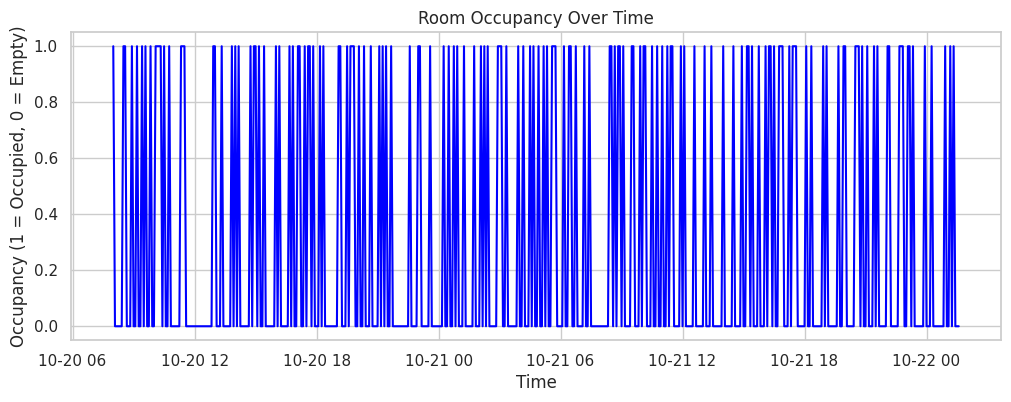

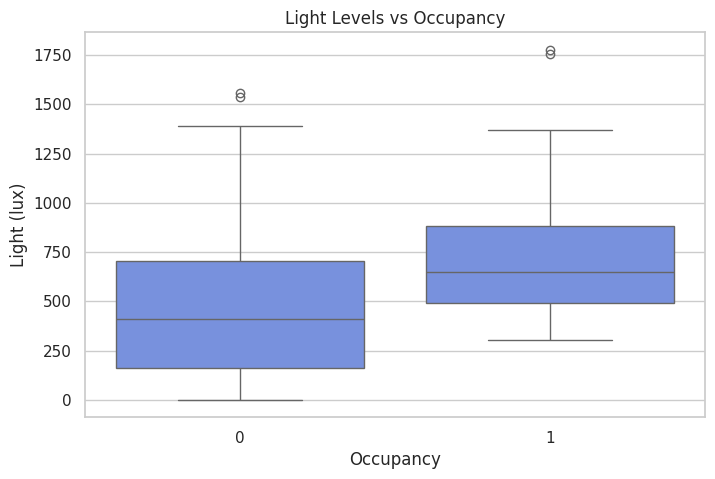

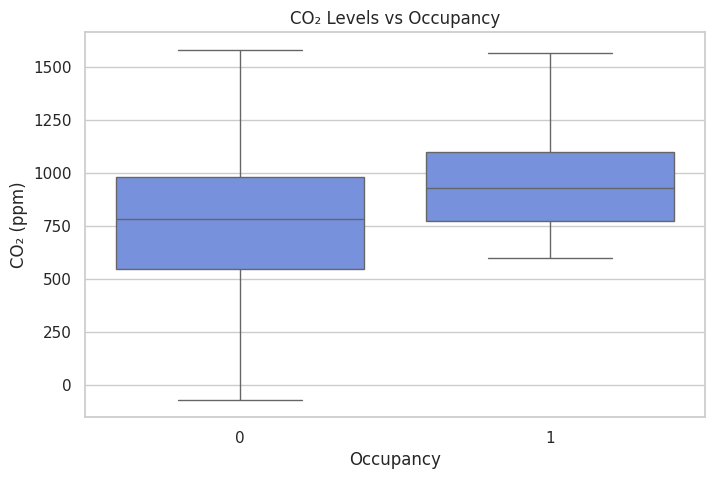

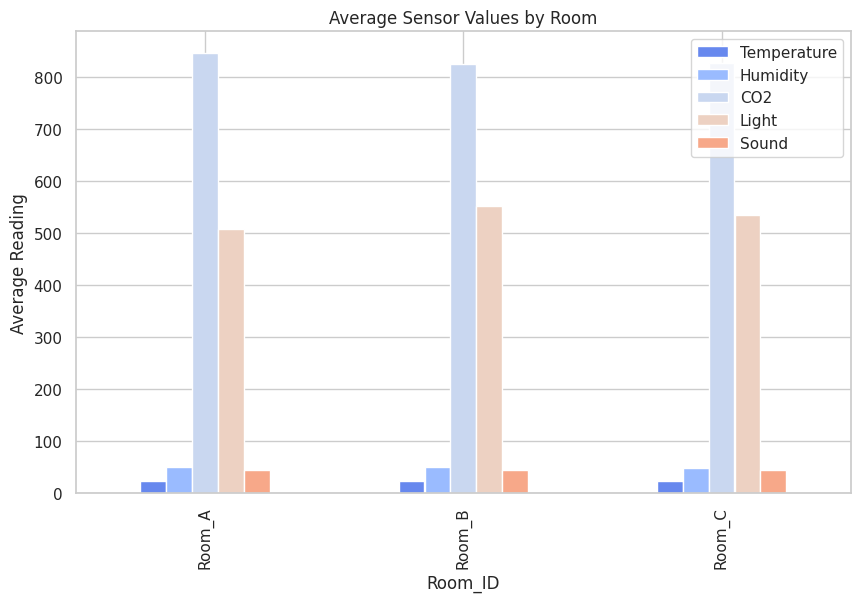

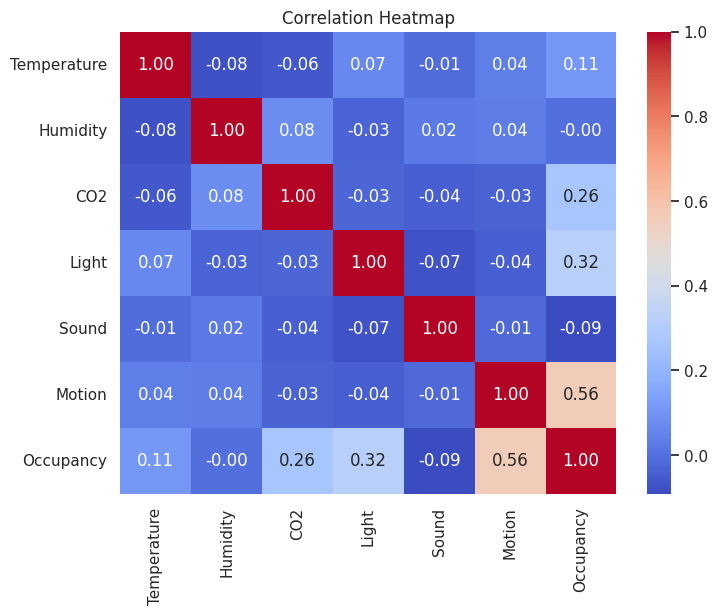

In [2]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
sns.set(style="whitegrid", palette="coolwarm")
np.random.seed(42)

# ======================================
# STEP 2: Generate IoT Sensor Data
# ======================================
n_samples = 500
timestamps = pd.date_range("2025-10-20 08:00", periods=n_samples, freq="5min")

# Simulated sensors
temperature = np.random.normal(23, 2, n_samples)      # °C
humidity = np.random.normal(50, 10, n_samples)        # %
co2 = np.random.normal(800, 300, n_samples)           # ppm
light = np.random.normal(500, 400, n_samples).clip(0, 2000)  # lux
sound = np.random.normal(45, 10, n_samples).clip(20, 80)     # dB
motion = np.random.choice([0, 1], size=n_samples, p=[0.4, 0.6])  # binary
rooms = np.random.choice(['Room_A', 'Room_B', 'Room_C'], size=n_samples)

# Occupancy logic
occupancy = ((motion == 1) & (light > 300) & (co2 > 600)).astype(int)

# ======================================
# STEP 3: Create DataFrame
# ======================================
df = pd.DataFrame({
    "Timestamp": timestamps,
    "Room_ID": rooms,
    "Temperature": np.round(temperature, 2),
    "Humidity": np.round(humidity, 2),
    "CO2": np.round(co2, 2),
    "Light": np.round(light, 2),
    "Sound": np.round(sound, 2),
    "Motion": motion,
    "Occupancy": occupancy
})

print("✅ Dataset created successfully!")
print(df.head())

# ======================================
# STEP 4: Save Dataset
# ======================================
df.to_csv("room_occupancy_iot.csv", index=False)
print("💾 Saved as 'room_occupancy_iot.csv'")

# ======================================
# STEP 5: Visualize Patterns
# ======================================

# --- Plot 1: Occupancy over time ---
plt.figure(figsize=(12, 4))
plt.plot(df['Timestamp'], df['Occupancy'], color='blue')
plt.title("Room Occupancy Over Time")
plt.xlabel("Time")
plt.ylabel("Occupancy (1 = Occupied, 0 = Empty)")
plt.show()

# --- Plot 2: Light vs Occupancy ---
plt.figure(figsize=(8, 5))
sns.boxplot(x="Occupancy", y="Light", data=df)
plt.title("Light Levels vs Occupancy")
plt.xlabel("Occupancy")
plt.ylabel("Light (lux)")
plt.show()

# --- Plot 3: CO2 vs Occupancy ---
plt.figure(figsize=(8, 5))
sns.boxplot(x="Occupancy", y="CO2", data=df)
plt.title("CO₂ Levels vs Occupancy")
plt.xlabel("Occupancy")
plt.ylabel("CO₂ (ppm)")
plt.show()

# --- Plot 4: Average sensor readings per room ---
avg_per_room = df.groupby("Room_ID")[["Temperature", "Humidity", "CO2", "Light", "Sound"]].mean()
avg_per_room.plot(kind="bar", figsize=(10,6))
plt.title("Average Sensor Values by Room")
plt.ylabel("Average Reading")
plt.show()

# --- Plot 5: Correlation Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(df[["Temperature","Humidity","CO2","Light","Sound","Motion","Occupancy"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

IoT Room Occupancy Dataset with People Count + Visualization

✅ Dataset created successfully!
            Timestamp Room_ID  Temperature  Humidity      CO2   Light  Sound  \
0 2025-10-20 08:00:00  Room_C        20.41     44.25   357.03  194.19  34.22   
1 2025-10-20 08:05:00  Room_A        22.32     41.63  1657.12  709.35  61.54   
2 2025-10-20 08:10:00  Room_C        20.46     51.31   699.55  867.18  43.70   
3 2025-10-20 08:15:00  Room_C        19.63     35.27   715.16  867.09  44.08   
4 2025-10-20 08:20:00  Room_A        22.15     51.67  1018.38  699.28  42.95   

   Motion  People_Count  Occupancy  
0       0             0          0  
1       1             4          1  
2       1             1          1  
3       1             1          1  
4       1             2          1  
💾 Saved as 'room_occupancy_people_iot.csv'


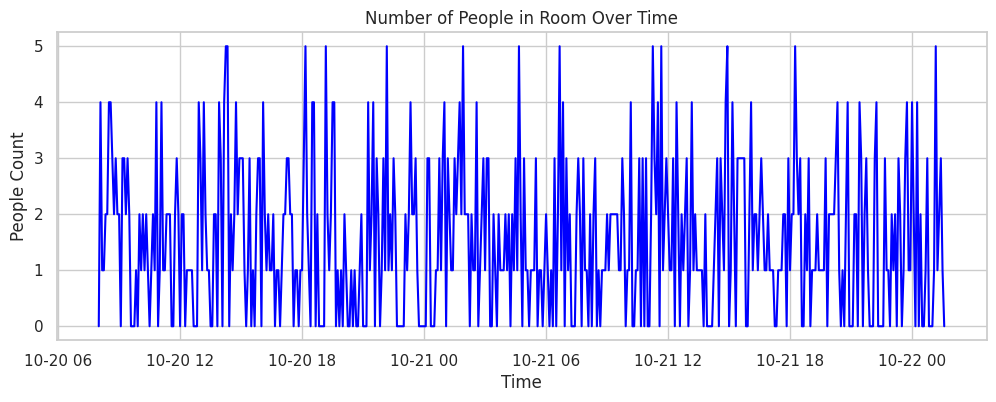

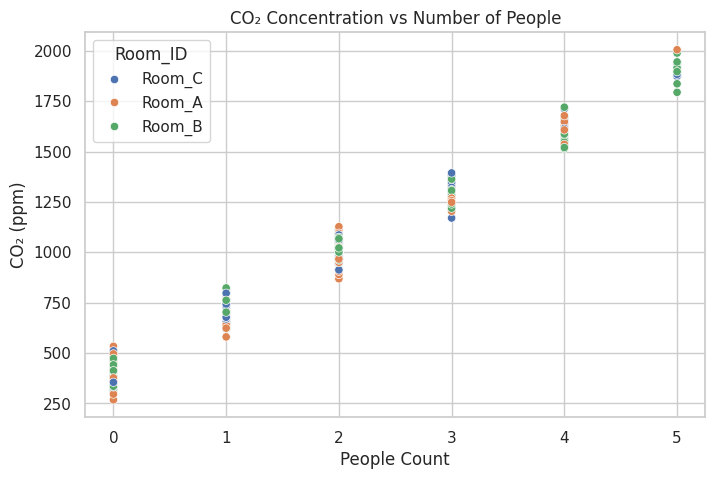

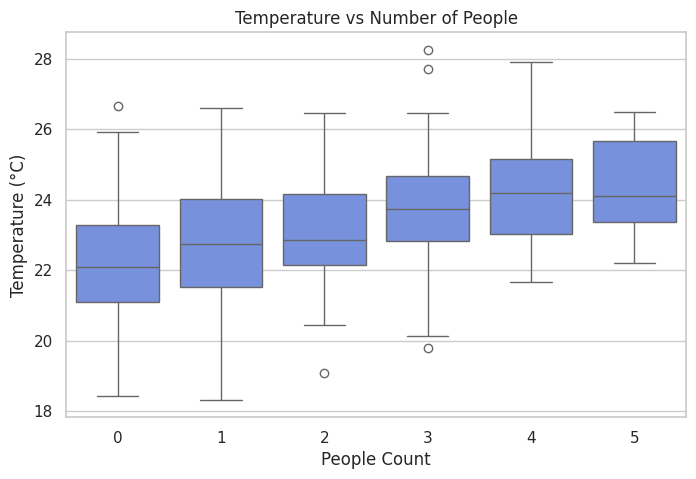

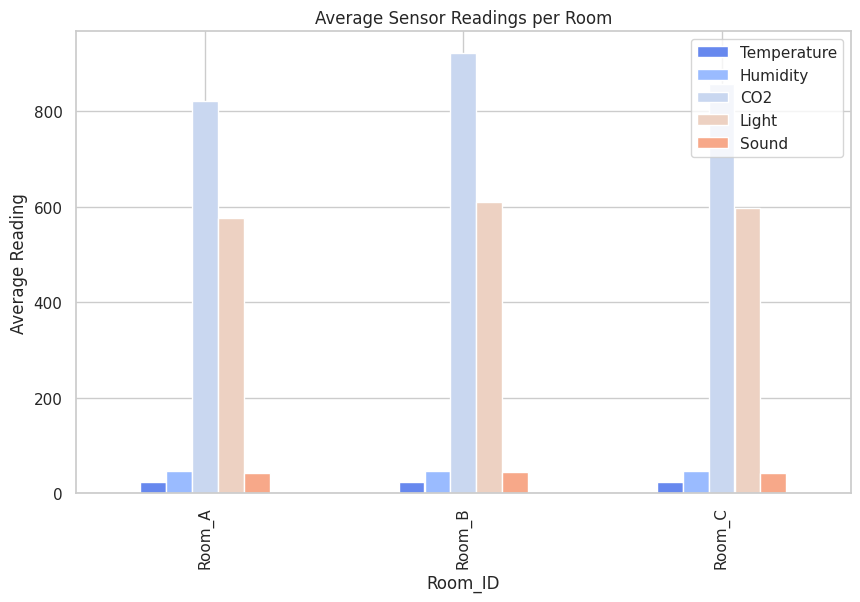

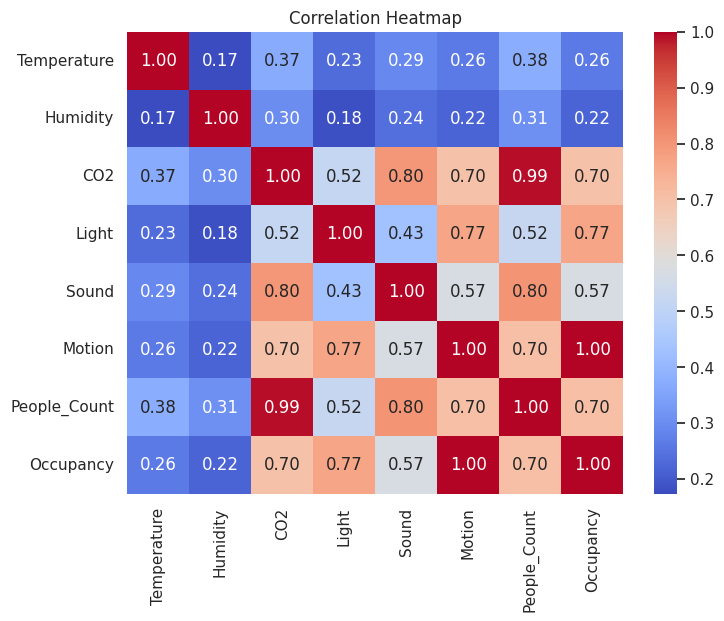

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="coolwarm")
np.random.seed(42)

# ======================================
# STEP 2: Generate IoT Sensor Data
# ======================================
n_samples = 500
timestamps = pd.date_range("2025-10-20 08:00", periods=n_samples, freq="5min")

# Simulate multiple rooms
rooms = np.random.choice(['Room_A', 'Room_B', 'Room_C'], size=n_samples)

# Number of people in the room (0 = empty, 1-5 = occupied)
people_count = np.random.choice(range(0, 6), size=n_samples, p=[0.3, 0.25, 0.2, 0.15, 0.07, 0.03])

# Define Occupancy (binary) from people count
occupancy = (people_count > 0).astype(int)

# Simulate sensor readings influenced by number of people
temperature = np.random.normal(22 + people_count * 0.5, 1.5, n_samples)  # more people = warmer
humidity = np.random.normal(45 + people_count * 1.2, 5, n_samples)
co2 = np.random.normal(400 + people_count * 300, 50, n_samples)          # more people = higher CO₂
light = np.random.normal(300 + occupancy * 400, 150, n_samples).clip(0, 2000)
sound = np.random.normal(35 + people_count * 5, 5, n_samples).clip(20, 90)
motion = (people_count > 0).astype(int)  # motion detected if room occupied

# ======================================
# STEP 3: Create DataFrame
# ======================================
df = pd.DataFrame({
    "Timestamp": timestamps,
    "Room_ID": rooms,
    "Temperature": np.round(temperature, 2),
    "Humidity": np.round(humidity, 2),
    "CO2": np.round(co2, 2),
    "Light": np.round(light, 2),
    "Sound": np.round(sound, 2),
    "Motion": motion,
    "People_Count": people_count,
    "Occupancy": occupancy
})

print("✅ Dataset created successfully!")
print(df.head())

# ======================================
# STEP 4: Save Dataset
# ======================================
df.to_csv("room_occupancy_people_iot.csv", index=False)
print("💾 Saved as 'room_occupancy_people_iot.csv'")

# ======================================
# STEP 5: Visualizations
# ======================================

# --- Plot 1: People Count over Time ---
plt.figure(figsize=(12, 4))
plt.plot(df["Timestamp"], df["People_Count"], color='blue')
plt.title("Number of People in Room Over Time")
plt.xlabel("Time")
plt.ylabel("People Count")
plt.show()

# --- Plot 2: CO₂ Levels vs People Count ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x="People_Count", y="CO2", data=df, hue="Room_ID", palette="deep")
plt.title("CO₂ Concentration vs Number of People")
plt.xlabel("People Count")
plt.ylabel("CO₂ (ppm)")
plt.show()

# --- Plot 3: Temperature vs People Count ---
plt.figure(figsize=(8, 5))
sns.boxplot(x="People_Count", y="Temperature", data=df)
plt.title("Temperature vs Number of People")
plt.xlabel("People Count")
plt.ylabel("Temperature (°C)")
plt.show()

# --- Plot 4: Average Sensor Values by Room ---
avg_room = df.groupby("Room_ID")[["Temperature", "Humidity", "CO2", "Light", "Sound"]].mean()
avg_room.plot(kind="bar", figsize=(10,6))
plt.title("Average Sensor Readings per Room")
plt.ylabel("Average Reading")
plt.show()

# --- Plot 5: Correlation Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(df[["Temperature","Humidity","CO2","Light","Sound","Motion","People_Count","Occupancy"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Dataset + ML Model

✅ Dataset created successfully!
            Timestamp Room_ID  Temperature  Humidity      CO2   Light  Sound  \
0 2025-10-20 08:00:00  Room_C        20.41     44.25   357.03  194.19  34.22   
1 2025-10-20 08:05:00  Room_A        22.32     41.63  1657.12  709.35  61.54   
2 2025-10-20 08:10:00  Room_C        20.46     51.31   699.55  867.18  43.70   
3 2025-10-20 08:15:00  Room_C        19.63     35.27   715.16  867.09  44.08   
4 2025-10-20 08:20:00  Room_A        22.15     51.67  1018.38  699.28  42.95   

   Motion  People_Count  Occupancy  
0       0             0          0  
1       1             4          1  
2       1             1          1  
3       1             1          1  
4       1             2          1  

📊 Model Evaluation:
R² Score: 1.000
Mean Absolute Error: 0.00 people


/tmp/ipython-input-1790618165.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")


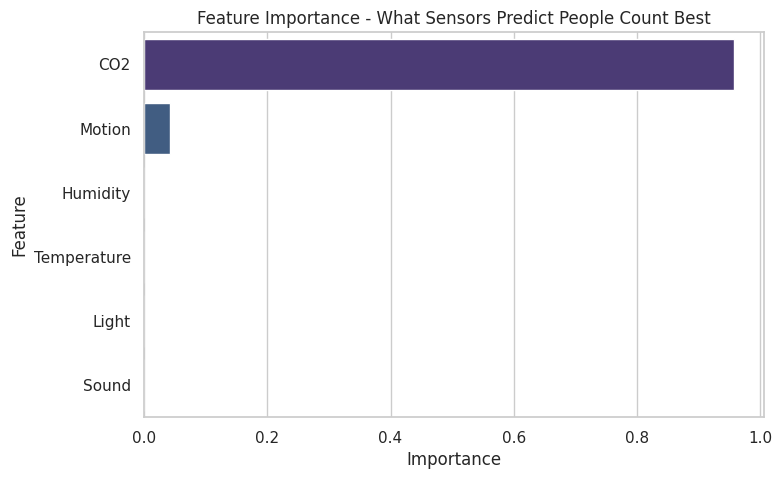

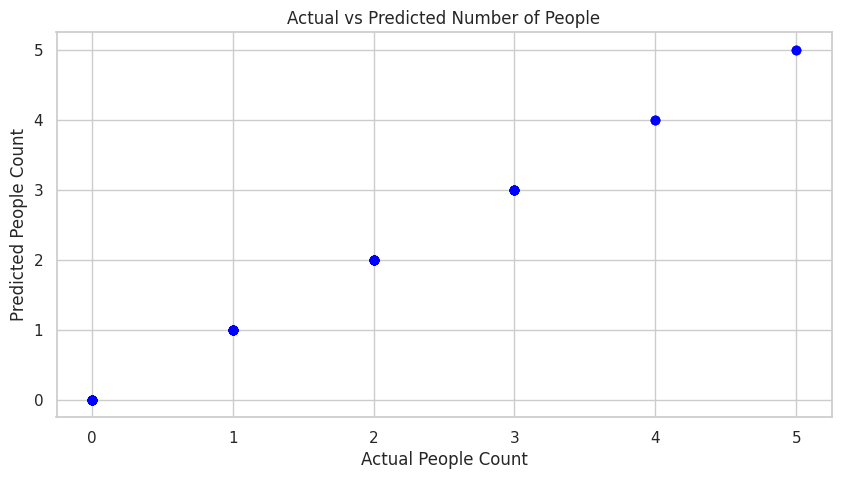

In [4]:
# STEP 1: Import Libraries
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

sns.set(style="whitegrid", palette="coolwarm")
np.random.seed(42)

# ======================================
# STEP 2: Generate IoT Sensor Dataset
# ======================================
n_samples = 500
timestamps = pd.date_range("2025-10-20 08:00", periods=n_samples, freq="5min")
rooms = np.random.choice(['Room_A', 'Room_B', 'Room_C'], size=n_samples)

# Simulate people count (0–5)
people_count = np.random.choice(range(0, 6), size=n_samples, p=[0.3, 0.25, 0.2, 0.15, 0.07, 0.03])
occupancy = (people_count > 0).astype(int)

# Sensor readings influenced by people count
temperature = np.random.normal(22 + people_count * 0.5, 1.5, n_samples)
humidity = np.random.normal(45 + people_count * 1.2, 5, n_samples)
co2 = np.random.normal(400 + people_count * 300, 50, n_samples)
light = np.random.normal(300 + occupancy * 400, 150, n_samples).clip(0, 2000)
sound = np.random.normal(35 + people_count * 5, 5, n_samples).clip(20, 90)
motion = (people_count > 0).astype(int)

# Create DataFrame
df = pd.DataFrame({
    "Timestamp": timestamps,
    "Room_ID": rooms,
    "Temperature": np.round(temperature, 2),
    "Humidity": np.round(humidity, 2),
    "CO2": np.round(co2, 2),
    "Light": np.round(light, 2),
    "Sound": np.round(sound, 2),
    "Motion": motion,
    "People_Count": people_count,
    "Occupancy": occupancy
})

print("✅ Dataset created successfully!")
print(df.head())

# ======================================
# STEP 3: Prepare Data for ML Model
# ======================================
# Drop non-numeric or time-based columns
X = df[["Temperature", "Humidity", "CO2", "Light", "Sound", "Motion"]]
y = df["People_Count"]

# Split dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# STEP 4: Train Random Forest Model
# ======================================
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ======================================
# STEP 5: Evaluate Model
# ======================================
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n📊 Model Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f} people")

# ======================================
# STEP 6: Feature Importance
# ======================================
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance - What Sensors Predict People Count Best")
plt.show()

# ======================================
# STEP 7: Compare Actual vs Predicted
# ======================================
comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": np.round(y_pred, 1)})
comparison.head(10)

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual People Count")
plt.ylabel("Predicted People Count")
plt.title("Actual vs Predicted Number of People")
plt.show()

=== Occupancy Prediction ===
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        73

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



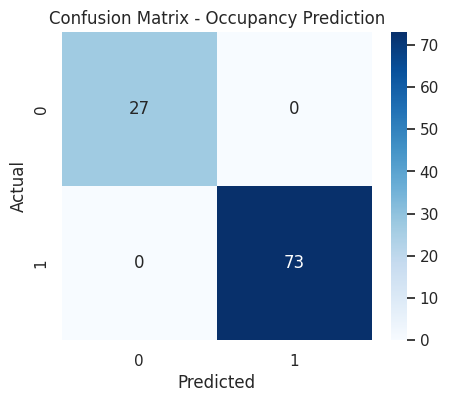

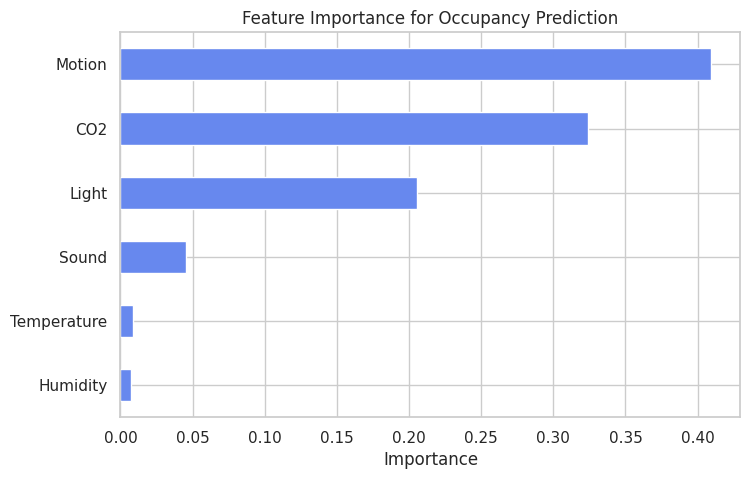


=== People Count Prediction ===
RMSE: 0.0


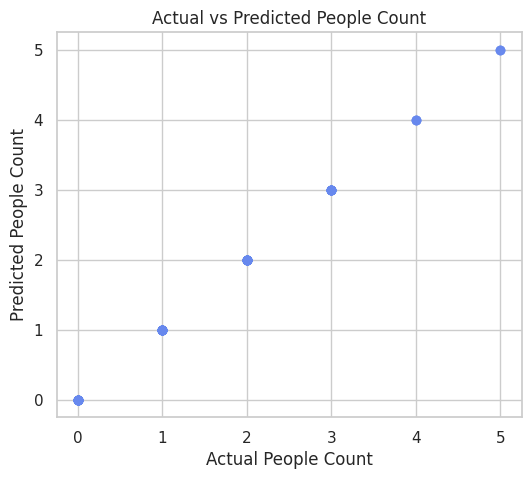

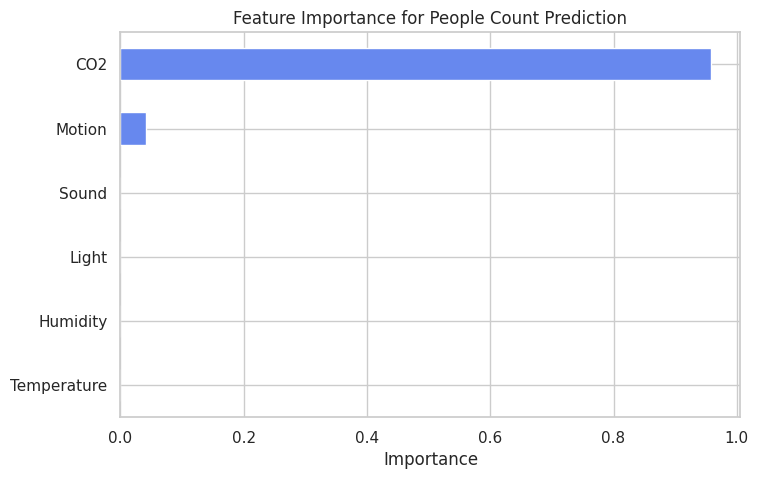

In [5]:

# ======================================
# STEP 6: Predict Occupancy (Classification)
# ======================================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Classification task: Occupancy ---
features = ["Temperature", "Humidity", "CO2", "Light", "Sound", "Motion"]
target = "Occupancy"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("=== Occupancy Prediction ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Occupancy Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Feature Importance ---
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(8,5))
importances.plot(kind="barh")
plt.title("Feature Importance for Occupancy Prediction")
plt.xlabel("Importance")
plt.show()


# ======================================
# STEP 7: Predict People Count (Regression)
# ======================================

X = df[features]
y = df["People_Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\n=== People Count Prediction ===")
print("RMSE:", round(rmse, 2))

# --- Scatter plot of actual vs predicted ---
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual People Count")
plt.ylabel("Predicted People Count")
plt.title("Actual vs Predicted People Count")
plt.show()

# --- Feature Importance ---
importances = pd.Series(reg.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(8,5))
importances.plot(kind="barh")
plt.title("Feature Importance for People Count Prediction")
plt.xlabel("Importance")
plt.show()


Analyze & Predict Temperature raise  Based on Occupancy

Correlation between Temperature and People Count: 0.38
Correlation between Temperature and Occupancy: 0.26


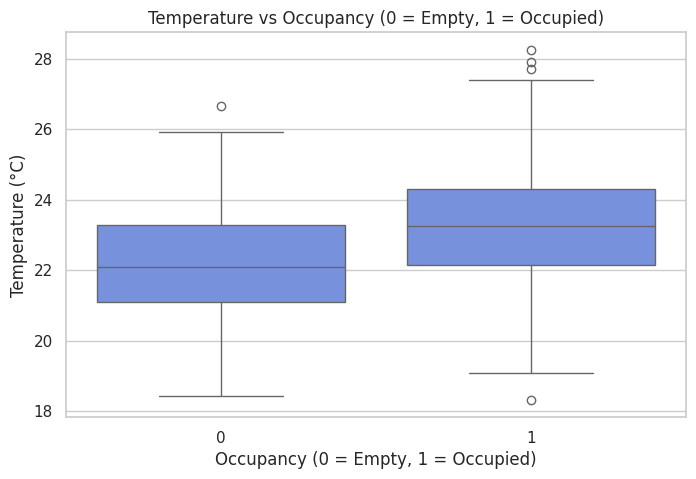

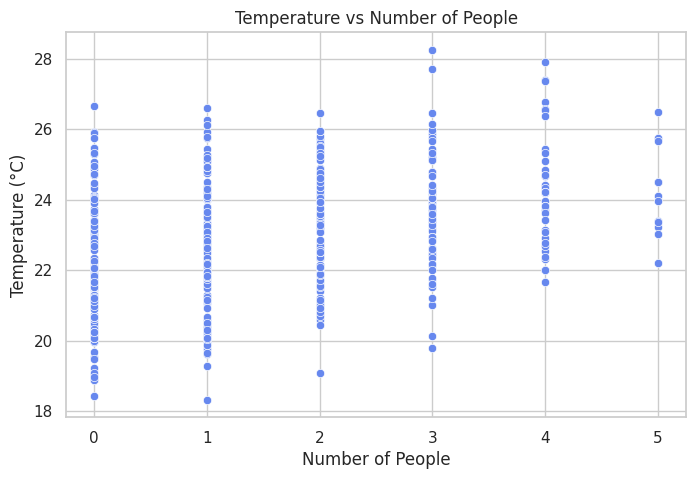


=== Temperature Prediction Model ===
Intercept: 22.21
Coefficients (People_Count, Occupancy): [ 0.49154537 -0.01364903]

Interpretation:
✔ Temperature increases by approximately 0.49°C per additional person in the room.
⚠ Occupancy has little or no effect on temperature in this model.


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- Correlation analysis ---
corr_temp_people = df["Temperature"].corr(df["People_Count"])
corr_temp_occupancy = df["Temperature"].corr(df["Occupancy"])

print("Correlation between Temperature and People Count:", round(corr_temp_people, 2))
print("Correlation between Temperature and Occupancy:", round(corr_temp_occupancy, 2))

# --- Visualization ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Occupancy", y="Temperature", data=df)
plt.title("Temperature vs Occupancy (0 = Empty, 1 = Occupied)")
plt.xlabel("Occupancy (0 = Empty, 1 = Occupied)")
plt.ylabel("Temperature (°C)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="People_Count", y="Temperature", data=df)
plt.title("Temperature vs Number of People")
plt.xlabel("Number of People")
plt.ylabel("Temperature (°C)")
plt.show()

# --- Predict Temperature using Linear Regression ---
X = df[["People_Count", "Occupancy"]]
y = df["Temperature"]

model = LinearRegression()
model.fit(X, y)

print("\n=== Temperature Prediction Model ===")
print("Intercept:", round(model.intercept_, 2))
print("Coefficients (People_Count, Occupancy):", model.coef_)

# --- Display interpretation ---
print("\nInterpretation:")
if model.coef_[0] > 0:
    print(f"✔ Temperature increases by approximately {model.coef_[0]:.2f}°C per additional person in the room.")
else:
    print("⚠ Temperature does not show a strong positive relationship with people count.")

if model.coef_[1] > 0:
    print(f"✔ Occupied rooms are on average {model.coef_[1]:.2f}°C warmer than empty ones.")
else:
    print("⚠ Occupancy has little or no effect on temperature in this model.")